<a href="https://colab.research.google.com/github/kenlo94/Affordable_Housing_2023/blob/rob_data_analytics/SanJoaquin%26SanMateo_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAN JOAQUIN COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['San_Joaquin_County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving San_Joaquin_County.csv to San_Joaquin_County (1).csv
            San Joaquin County
Dates                         
2000-01-31            166188.0
2000-02-29            165106.0
2000-03-31            165181.0
2000-04-30            165407.0
2000-05-31            166873.0
...                        ...
NaT                        NaN
NaT                        NaN
NaT                        NaN
NaT                        NaN
NaT                        NaN

[461 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,San Joaquin County
Dates,
2000-01-31,166188.0
2000-02-29,165106.0
2000-03-31,165181.0
2000-04-30,165407.0
2000-05-31,166873.0
...,...
2021-12-31,527968.0
2022-01-31,531647.0
2022-02-28,536686.0


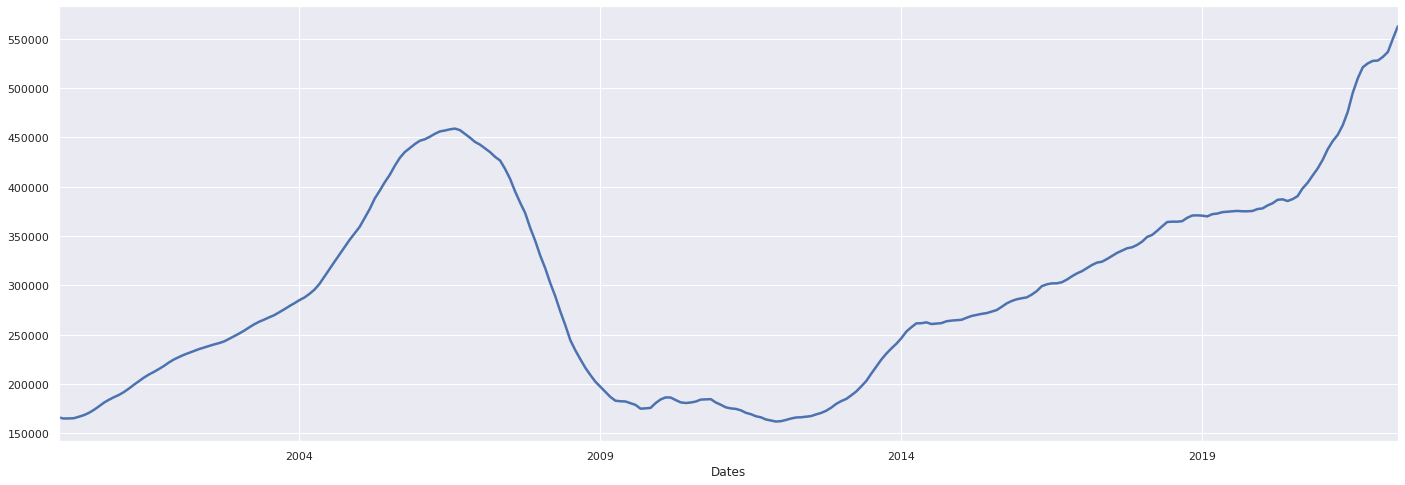

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['San Joaquin County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['San Joaquin County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


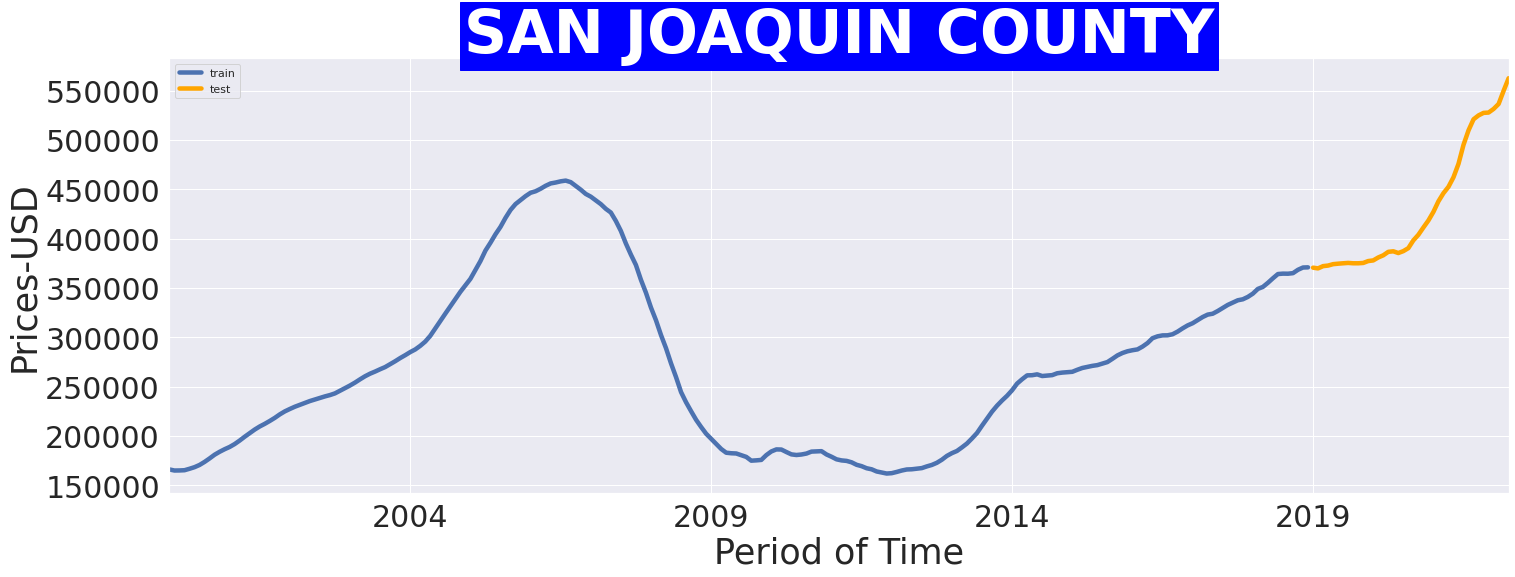

In [ ]:
RealData_df['San Joaquin County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['San Joaquin County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("SAN JOAQUIN COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 4s 19ms/step - loss: 0.2349 - mean_absolute_error: 0.4031 - val_loss: 0.5037 - val_mean_absolute_error: 0.6550
Epoch 2/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.1681 - val_loss: 0.0783 - val_mean_absolute_error: 0.2427
Epoch 3/60
46/46 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0470 - val_loss: 0.0129 - val_mean_absolute_error: 0.0825
Epoch 4/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0382 - val_loss: 0.0120 - val_mean_absolute_error: 0.0780
Epoch 5/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0395 - val_loss: 0.0117 - val_mean_absolute_error: 0.0767
Epoch 6/60
46/46 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0389 - val_loss: 0.0048 - val_mean_absolute_error: 0.0543
Epoch 7/60
46/46 [=========

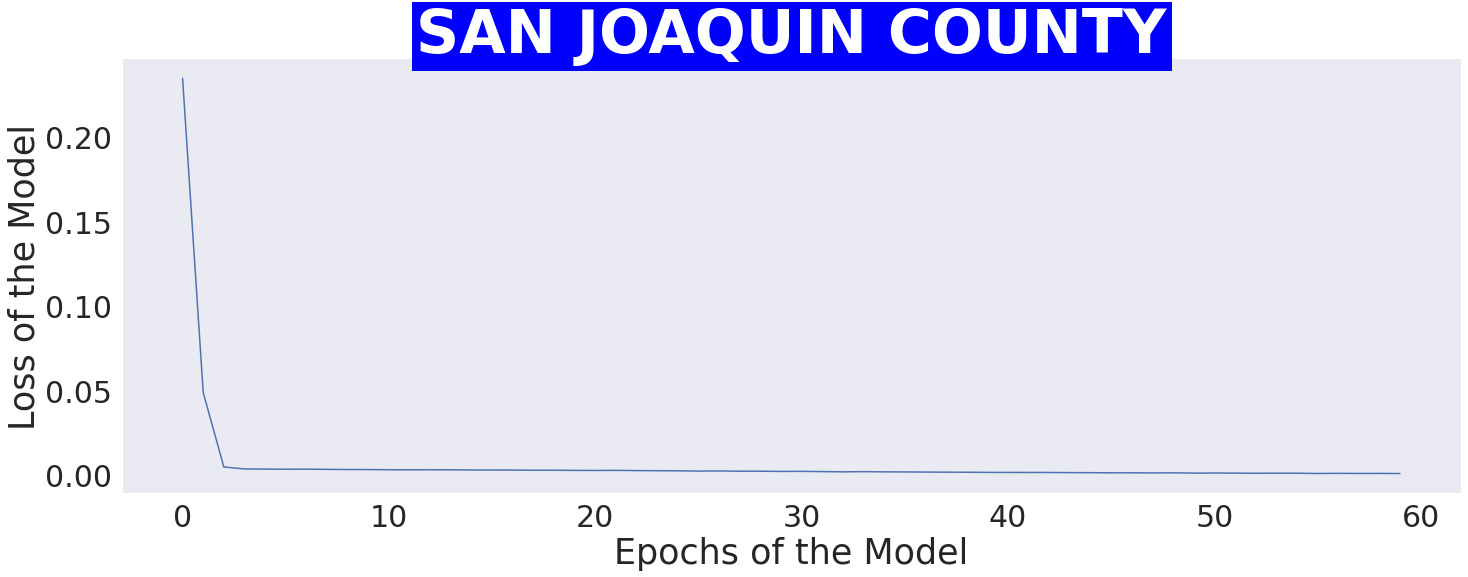

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("SAN JOAQUIN COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.4088695 , 0.43282482, 0.43213695, 0.44429377, 0.44512987,
       0.4476382 , 0.45007744, 0.44560054, 0.44651777, 0.449736  ,
       0.4673312 , 0.46837902, 0.49536124, 0.5084654 , 0.5365077 ,
       0.5323873 , 0.5139273 , 0.53728014, 0.5613093 , 0.6295878 ,
       0.6634225 , 0.7204147 , 0.77042186, 0.8373121 , 0.91998535,
       0.9747005 , 1.0184897 , 1.0985582 , 1.2100848 , 1.3692311 ,
       1.4773171 , 1.5633429 , 1.5871384 , 1.6068708 , 1.6072462 ,
       1.6417948 , 1.6857476 , 1.8069323 ], dtype=float32)

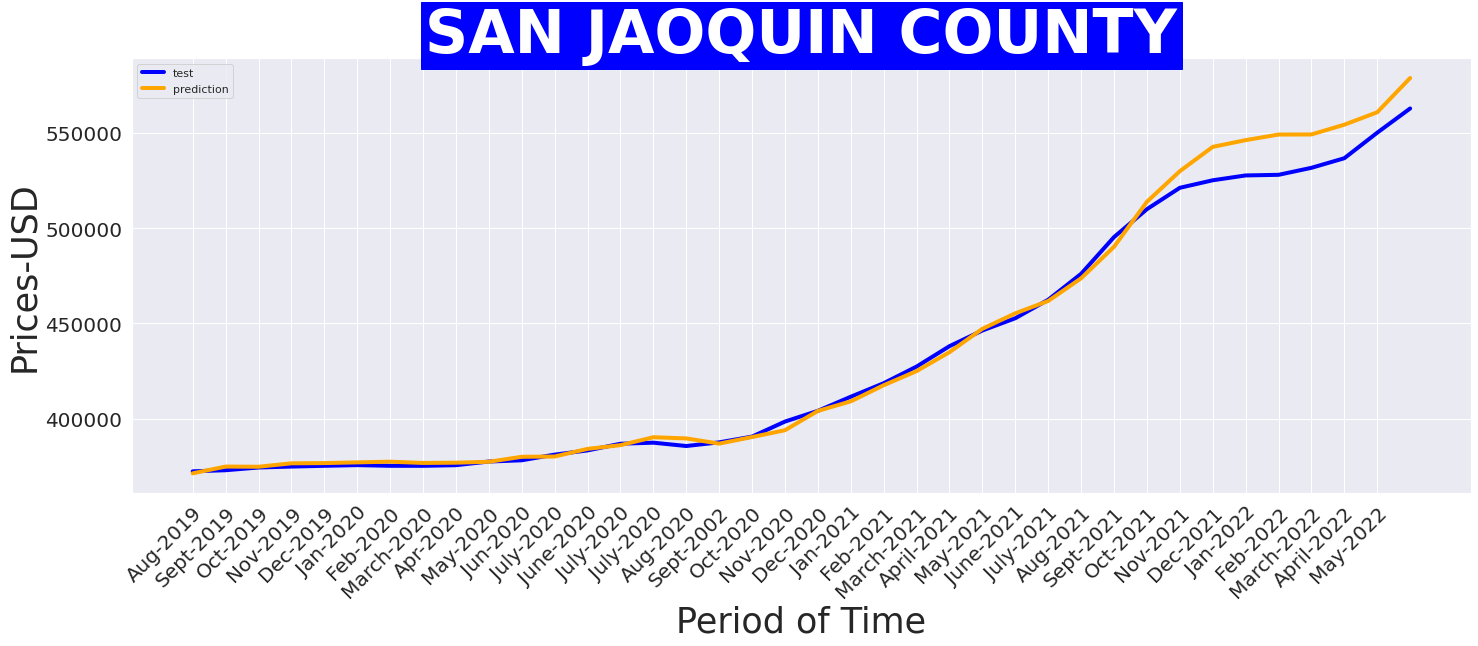

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("SAN JAOQUIN COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'SAN JOAQUIN COUNTY')

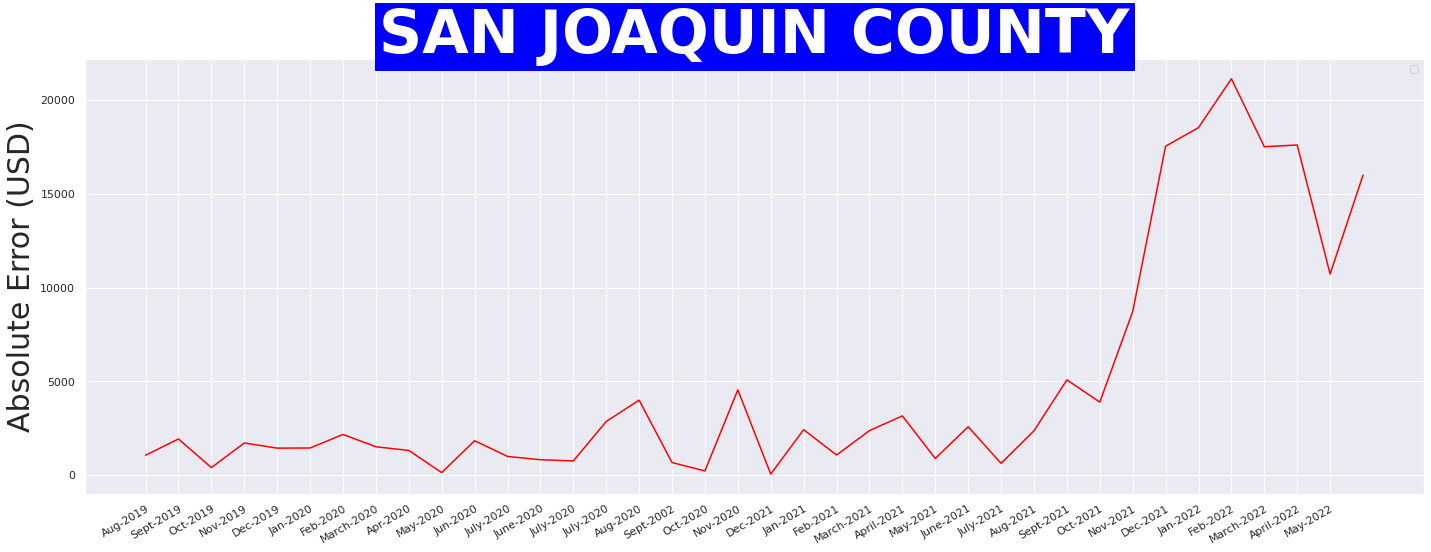

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("SAN JOAQUIN COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

#plt.grid()

In [ ]:
y_pred_inv

array([[371232.9 ],
       [374789.66],
       [374687.53],
       [376492.53],
       [376616.7 ],
       [376989.06],
       [377351.25],
       [376686.56],
       [376822.72],
       [377300.56],
       [379913.  ],
       [380068.6 ],
       [384074.75],
       [386020.4 ],
       [390183.97],
       [389572.22],
       [386831.38],
       [390298.7 ],
       [393866.38],
       [404004.03],
       [409027.66],
       [417489.6 ],
       [424914.38],
       [434845.9 ],
       [447120.84],
       [455244.66],
       [461746.25],
       [473634.44],
       [490193.34],
       [513822.6 ],
       [529870.7 ],
       [542643.3 ],
       [546176.4 ],
       [549106.1 ],
       [549161.9 ],
       [554291.5 ],
       [560817.4 ],
       [578810.25]], dtype=float32)

# **SAN MATEO COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['SanMateo_County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving SanMateo_County.csv to SanMateo_County (1).csv
            San Mateo County
Dates                       
2000-01-31          491732.0
2000-02-29          494876.0
2000-03-31          499085.0
2000-04-30          507271.0
2000-05-31          518440.0
...                      ...
NaT                      NaN
NaT                      NaN
NaT                      NaN
NaT                      NaN
NaT                      NaN

[461 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,San Mateo County
Dates,
2000-01-31,491732.0
2000-02-29,494876.0
2000-03-31,499085.0
2000-04-30,507271.0
2000-05-31,518440.0
...,...
2021-12-31,1692032.0
2022-01-31,1711260.0
2022-02-28,1731467.0


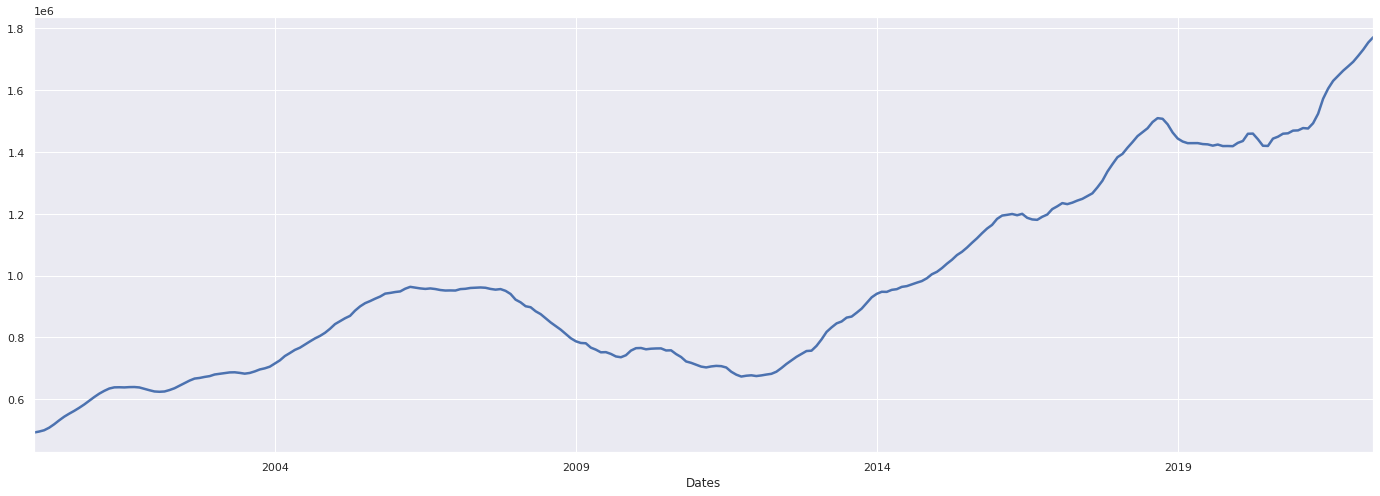

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['San Mateo County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['San Mateo County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


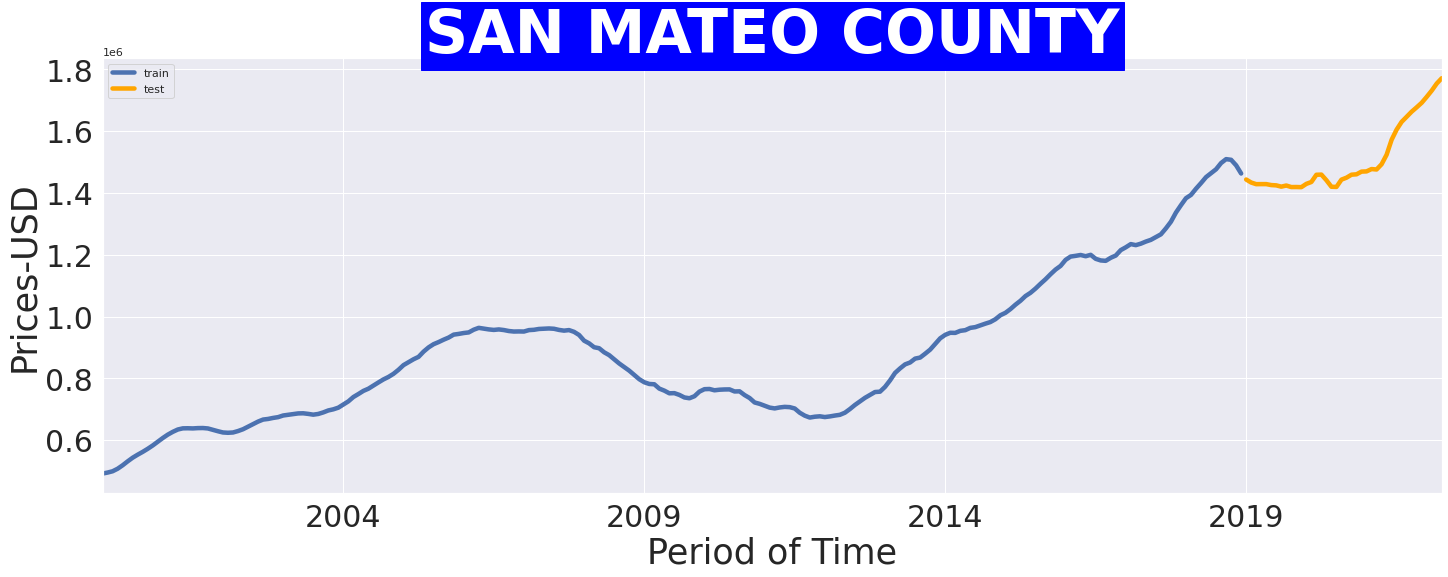

In [ ]:
RealData_df['San Mateo County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['San Mateo County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("SAN MATEO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 3s 18ms/step - loss: 0.1449 - mean_absolute_error: 0.3095 - val_loss: 0.5490 - val_mean_absolute_error: 0.7261
Epoch 2/60
46/46 [==============================] - 0s 7ms/step - loss: 0.0335 - mean_absolute_error: 0.1302 - val_loss: 0.1010 - val_mean_absolute_error: 0.3030
Epoch 3/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0346 - val_loss: 0.0045 - val_mean_absolute_error: 0.0506
Epoch 4/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0265 - val_loss: 0.0030 - val_mean_absolute_error: 0.0449
Epoch 5/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0253 - val_loss: 0.0024 - val_mean_absolute_error: 0.0400
Epoch 6/60
46/46 [==============================] - 0s 6ms/step - loss: 9.2013e-04 - mean_absolute_error: 0.0243 - val_loss: 0.0035 - val_mean_absolute_error: 0.0512
Epoch 7/60
46/46 [=====

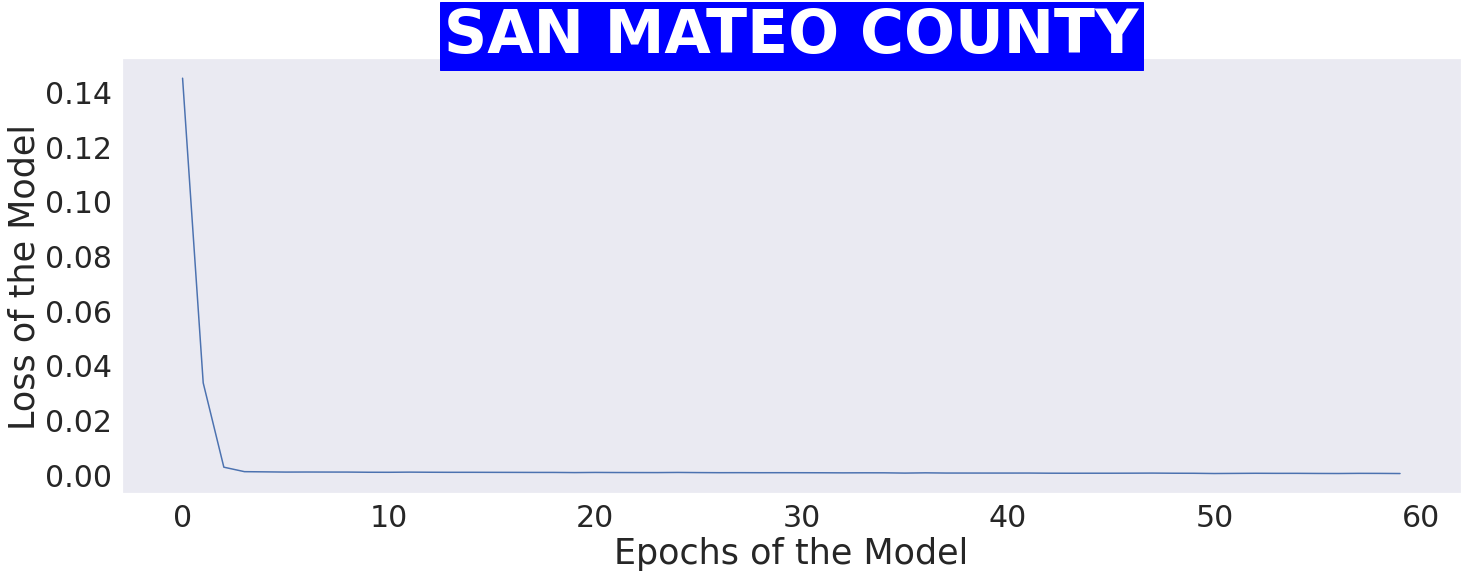

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("SAN MATEO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.9108845 , 0.8982902 , 0.8959708 , 0.8960362 , 0.8914852 ,
       0.88855433, 0.8819613 , 0.8853116 , 0.87969846, 0.87755555,
       0.87688273, 0.8924995 , 0.90651023, 0.9432545 , 0.9556614 ,
       0.9296876 , 0.88953334, 0.8784261 , 0.91294146, 0.9334102 ,
       0.9504131 , 0.9571169 , 0.9701013 , 0.97563326, 0.9866074 ,
       0.98859626, 1.0114367 , 1.0621358 , 1.1422194 , 1.2109791 ,
       1.2609496 , 1.2958153 , 1.3253785 , 1.3520652 , 1.3776699 ,
       1.4084865 , 1.4430766 , 1.4808924 ], dtype=float32)

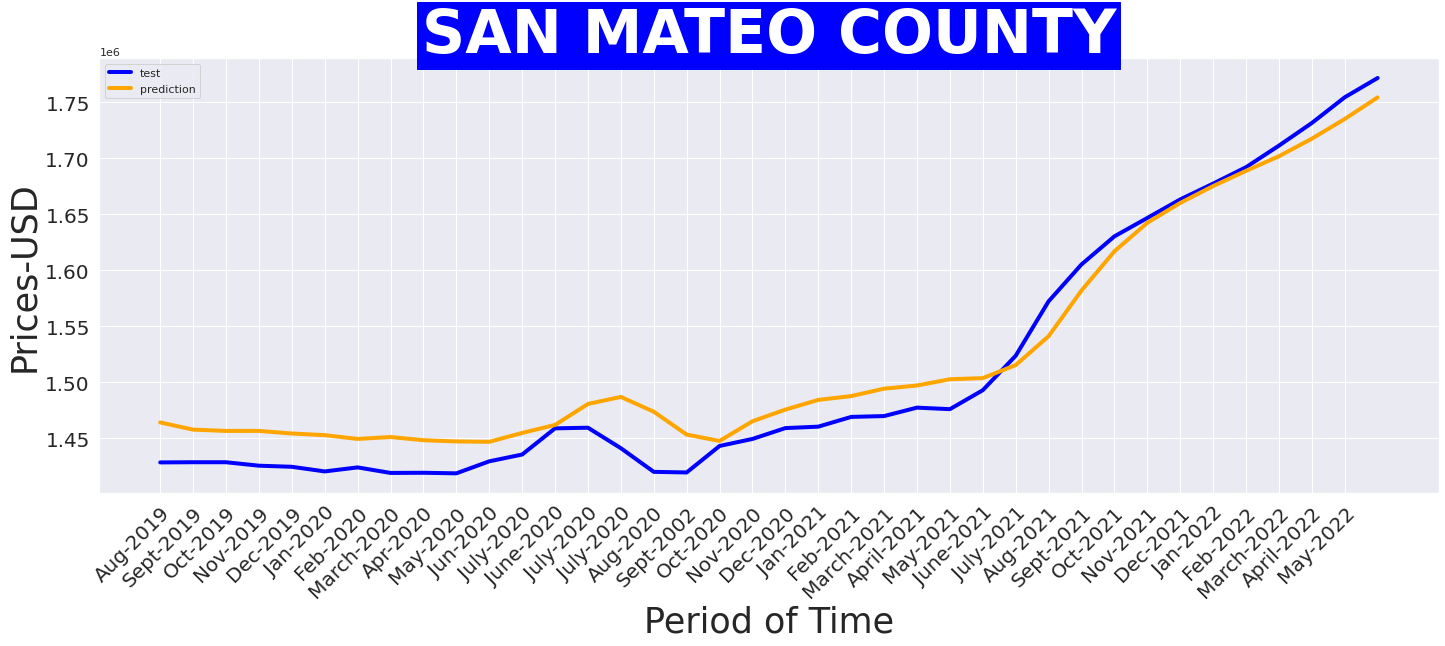

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.title("SAN MATEO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'SAN MATEO COUNTY')

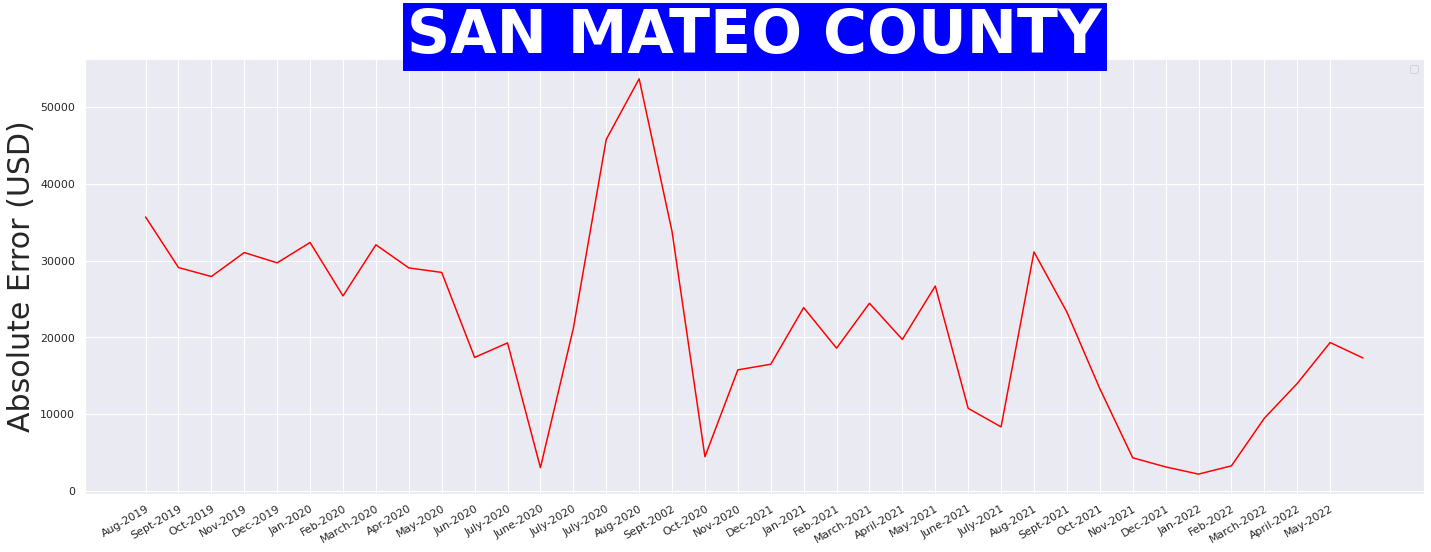

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("SAN MATEO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
#plt.grid()

In [ ]:
y_pred_inv

array([[1464220.2],
       [1457810.8],
       [1456630.5],
       [1456663.8],
       [1454347.6],
       [1452856. ],
       [1449500.8],
       [1451205.8],
       [1448349.1],
       [1447258.6],
       [1446916.1],
       [1454863.8],
       [1461994.1],
       [1480694.1],
       [1487008.1],
       [1473789.5],
       [1453354.2],
       [1447701.6],
       [1465267.1],
       [1475684.1],
       [1484337.1],
       [1487748.9],
       [1494357. ],
       [1497172.2],
       [1502757.2],
       [1503769.4],
       [1515393.4],
       [1541195.1],
       [1581951.4],
       [1616944.5],
       [1642375.6],
       [1660119.5],
       [1675164.8],
       [1688746.1],
       [1701776.9],
       [1717460.1],
       [1735063.8],
       [1754309. ]], dtype=float32)